In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
dataset = pd.read_csv('hotel_bookings_data.csv')

In [121]:
df = dataset.copy()

In [106]:
df.shape

(119390, 29)

In [8]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [28]:
df_info = pd.DataFrame({'missing_value'      : df.isnull().sum(),
                        'missing_percentage' : df.isnull().mean() * 100,
                        'unique_value'       : df.nunique(),
                        'data_type'          : df.dtypes
                        }).reset_index(names='feature')
df_info

,feature,missing_value,missing_percentage,unique_value,data_type
0,hotel,0,0.000000,2,object
1,is_canceled,0,0.000000,2,int64
2,lead_time,0,0.000000,479,int64
3,arrival_date_year,0,0.000000,3,int64
4,arrival_date_month,0,0.000000,12,object
5,arrival_date_week_number,0,0.000000,53,int64
6,arrival_date_day_of_month,0,0.000000,31,int64
7,stays_in_weekend_nights,0,0.000000,17,int64
8,stays_in_weekdays_nights,0,0.000000,35,int64
9,adults,0,0.000000,14,int64


In [23]:
missing_value = df_info[df_info['missing_value']>0].sort_values(by='missing_value', ascending=False)
missing_value

,feature,missing_value,missing_percentage,unique_value,data_type
22,company,112593,94.306893,352,float64
21,agent,16340,13.686238,333,float64
13,city,488,0.408744,177,object
10,children,4,0.003350,5,float64


In [122]:
df.drop('company', axis=1, inplace=True)
df['agent'].fillna(0, inplace=True)
df['city'].fillna(df['city'].mode()[0], inplace=True)
df['children'].fillna(0, inplace=True)

In [123]:
df['meal'].replace('Undefined', 'No Meal', inplace=True)
df['market_segment'].replace('Undefined', 'Aviation', inplace=True)
df['distribution_channel'].replace('Undefined', 'GDS', inplace=True)

In [124]:
df['guest'] = df['adults'] + df['children'] + df['babies']
df['guest'] = df['guest'].astype(int)
df['stays_duration'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']
df['stays_duration'] = df['stays_duration'].astype(int)
df.drop(['adults', 'children', 'babies'], axis=1, inplace=True)

In [125]:
df.rename(columns={
    'is_repeated_guest'             : 'repeated_guest',
    'arrival_date_year'             : 'arrival_year',
    'arrival_date_month'            : 'arrival_month',
    'arrival_date_week_number'      : 'arrival_week',
    'arrival_date_day_of_month'     : 'arrival_date',
    'stays_in_weekdays_nights'      : 'weekdays_nights',
    'previous_bookings_not_canceled': 'previous_not_canceled',
    'required_car_parking_spaces'   : 'parking_spaces',
    'total_of_special_requests'     : 'special_requests'
}, inplace=True)

In [126]:
dfg = df.groupby(['hotel', 'arrival_year', 'arrival_month']).agg({'guest' : 'sum'}).reset_index()

In [127]:
# Sort by month
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
dfg['arrival_month'] = pd.Categorical(dfg['arrival_month'], categories=months)
dfg = dfg.sort_values(['arrival_month', 'hotel']).reset_index(drop=True)
dfg

,hotel,arrival_year,arrival_month,guest
0,City Hotel,2017,January,1951
1,City Hotel,2018,January,5573
2,Resort Hotel,2017,January,1856
3,Resort Hotel,2018,January,2432
4,City Hotel,2017,February,3050
5,City Hotel,2018,February,5095
6,Resort Hotel,2017,February,2420
7,Resort Hotel,2018,February,2631
8,City Hotel,2018,March,2285
9,City Hotel,2019,March,4436


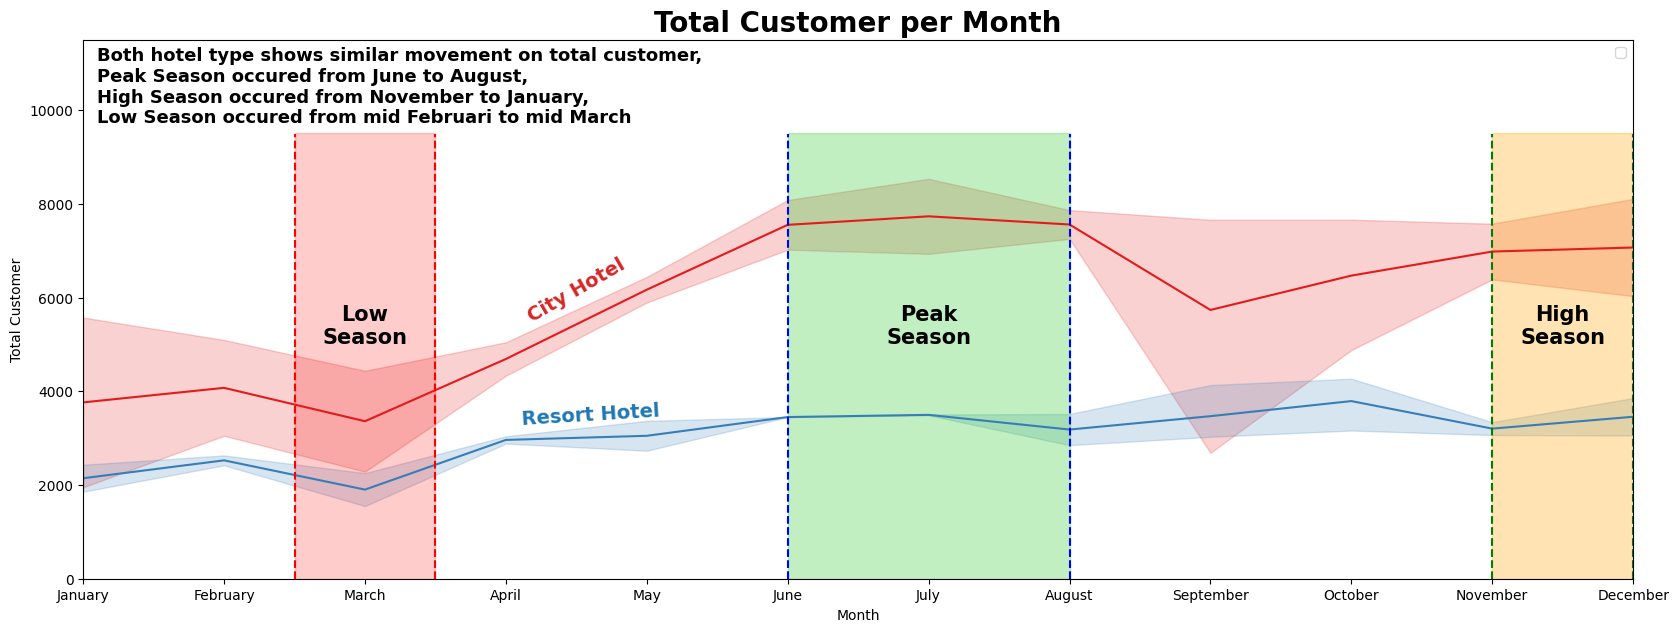

In [128]:
plt.figure(figsize=(20,7))
sns.lineplot(data = dfg, x = 'arrival_month', y = 'guest', hue = 'hotel', palette='Set1')
plt.title('Total Customer per Month', weight='bold', fontsize = 20)
plt.ylabel('Total Customer')
plt.xlabel('Month')
plt.text(x=0.1, y=10500,
         s='Both hotel type shows similar movement on total customer, \nPeak Season occured from June to August, \nHigh Season occured from November to January, \nLow Season occured from mid Februari to mid March',
         fontsize=13, ha='left', va='center', fontweight='bold')

plt.axvline(1.5, color='red', linestyle='--', ymax = 0.825, ymin = 0)
plt.axvline(2.5, color='red', linestyle='--', ymax = 0.825, ymin = 0)
plt.stackplot(np.arange(1.5,3.5), [9500], color='red', alpha=0.2)
plt.text(x = 2, y = 5400, s = 'Low\nSeason', va = 'center', ha = 'center', fontsize =15, color='black', fontweight='bold')

plt.axvline(10, color='green', linestyle='--',ymax = 0.825, ymin = 0)
plt.axvline(11, color='green', linestyle='--',ymax = 0.825, ymin = 0)
plt.stackplot(np.arange(10,12), [9500], color='orange', alpha=0.3)
plt.text(x = 10.5, y = 5400, s = 'High\nSeason', va = 'center', ha = 'center', fontsize =15, color='black', fontweight='bold')

plt.axvline(5, color='blue', linestyle='--', ymax=0.825, ymin=0)
plt.axvline(7, color='blue', linestyle='--', ymax=0.825, ymin=0)
plt.stackplot(np.arange(5,7.5), [9500], color='limegreen', alpha=0.3)
plt.text(x = 6, y = 5400, s='Peak\nSeason', va='center', ha='center', fontsize=15, color='black', fontweight='bold')

plt.xlim(0,11)
plt.ylim(0,11500)
plt.legend([])
plt.text(x=3.5, y=5500, s='City Hotel', rotation=30, fontsize=14, color='tab:red', ha='center', fontweight='bold')
plt.text(x=3.6, y=3300, s='Resort Hotel', rotation=3.5, fontsize=14, color='tab:blue', ha='center', fontweight='bold')
plt.show()

(0.0, 0.5)

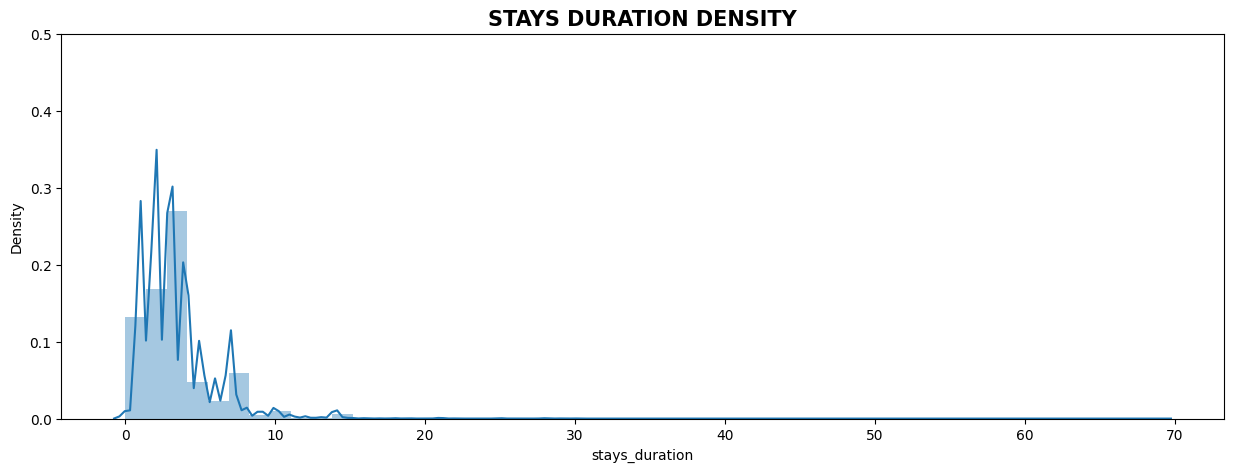

In [129]:
plt.figure(figsize=(15,5))
sns.distplot(df['stays_duration'])
plt.title('STAYS DURATION DENSITY', fontsize=15, fontweight='bold')
plt.plot
plt.ylim(0, 0.5)

In [130]:
df['week_stay'] = df['stays_duration'].apply(lambda x: '< 1' if x < 8 else
                                               ('1-2' if x < 15 else
                                                ('2-3' if x < 22 else
                                                 ('3-4' if x < 29 else
                                                  '> 4'))))
df['week_stay'].value_counts()

week_stay
< 1    114133
1-2      4818
2-3       277
3-4       111
> 4        51
Name: count, dtype: int64

In [140]:
df_cancel     = df[df['is_canceled'] == 1].groupby(['hotel','week_stay']).aggregate({'is_canceled' : 'count'}).reset_index()
df_not_cancel = df[df['is_canceled'] == 0].groupby(['hotel','week_stay']).aggregate({'is_canceled' : 'count'}).reset_index()
df_cancel['cancellation_rate'] = (df_cancel['is_canceled'] / (df_cancel['is_canceled'] + df_not_cancel['is_canceled']) * 100).round(2)
df_cancel

,hotel,week_stay,is_canceled,cancellation_rate
0,City Hotel,1-2,558,51.38
1,City Hotel,2-3,77,71.30
2,City Hotel,3-4,21,75.00
3,City Hotel,< 1,32426,41.53
4,City Hotel,> 4,20,76.92
5,Resort Hotel,1-2,1078,28.89
6,Resort Hotel,2-3,79,46.75
7,Resort Hotel,3-4,39,46.99
8,Resort Hotel,< 1,9919,27.51
9,Resort Hotel,> 4,7,28.00


In [141]:
weeks = ['< 1', '1-2', '2-3', '3-4', '> 4']

df_cancel['week_stay'] = pd.Categorical(df_cancel['week_stay'], categories=weeks)
df_cancel = df_cancel.sort_values(['week_stay', 'hotel']).reset_index(drop=True)
df_cancel

,hotel,week_stay,is_canceled,cancellation_rate
0,City Hotel,< 1,32426,41.53
1,Resort Hotel,< 1,9919,27.51
2,City Hotel,1-2,558,51.38
3,Resort Hotel,1-2,1078,28.89
4,City Hotel,2-3,77,71.30
5,Resort Hotel,2-3,79,46.75
6,City Hotel,3-4,21,75.00
7,Resort Hotel,3-4,39,46.99
8,City Hotel,> 4,20,76.92
9,Resort Hotel,> 4,7,28.00


KeyError: 'cancellation_rate'

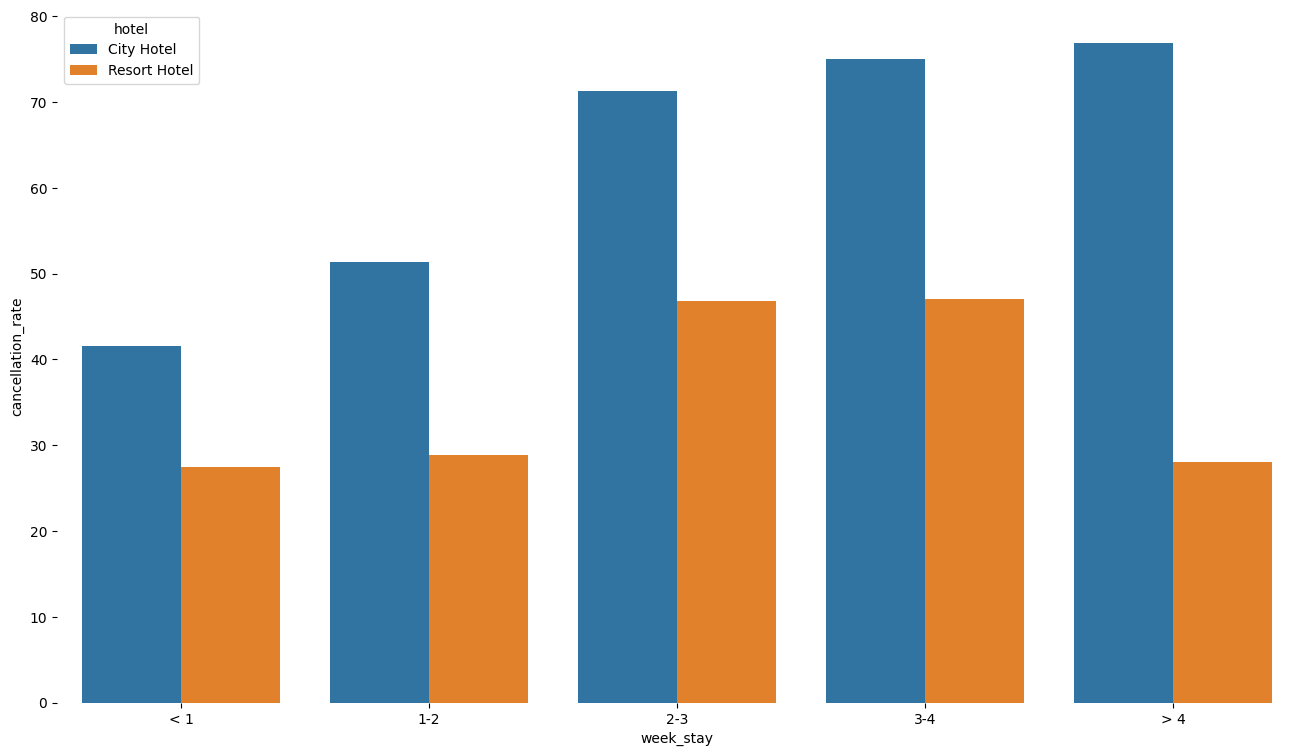

In [142]:
plt.style.use('default')
fig, ax = plt.subplots()
fig.set_size_inches(16, 9)
ax.spines[['top', 'right', 'bottom', 'left']].set_visible(False)
# sns.despine()

ax = sns.barplot(x='week_stay',
                 y='cancellation_rate',
                 hue='hotel',
                 hue_order = ['City Hotel', 'Resort Hotel'],
                 data=df_cancel,
                 palette='tab10')

for c in ax.patches:
    c.set_zorder(0)
sns.regplot(x=np.arange(0, len(cancel[cancel['hotel'] == 'City Hotel'])),
            y='cancellation_rate', 
            data=cancel[cancel['hotel'] == 'City Hotel'], scatter=False, label='Trend City Hotel', truncate=False)
sns.regplot(x=np.arange(0, len(cancel[cancel['hotel'] == 'City Hotel'])),
            y='cancellation_rate', 
            data=cancel[cancel['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel', truncate=False)


plt.title('Tingkat Pembatalan Hotel Tipe City dan Resort Mengalami Peningkatan yang Signifikan',
          fontsize=18, fontweight='bold', loc='left', pad=50)
plt.text(x=-0.6375, y=125,
         s='Durasi menginap.',
         fontsize=16, ha='left', va='center')

# Label
plt.xticks(range(0, 5, 1))
plt.xlabel('Weeks Stay', fontsize=12)
plt.ylabel('Cancellation Rate (%)')
plt.bar_label(ax.containers[0], fmt='%.1f%%', fontsize=14, fontweight='bold')
plt.bar_label(ax.containers[1], fmt='%.1f%%', fontsize=14, fontweight='bold')

# Legend
plt.legend(title='Hotel', title_fontsize=14, prop={'size':12})

plt.show()